In [1]:
import pandas as pd

data = pd.read_csv("wdbc.csv") # READ THE DATASET


In [2]:
# DATA NORMALIZATION

x = data.copy() # COPY THE DATA INTO A VARIABLE x

# Delete non-numerical values
del x["ID Number"]
del x["Diagnosis"]

# Centralise and Standardize the data
X_std = (x - x.mean())/x.std()


In [5]:
# import numpy to calculate eigen values and covariance matrix
import numpy as np

mean_vec = np.mean(X_std, axis = 0)

cov_mat = np.cov(X_std.T)

values, vectors = np.linalg.eig(cov_mat) #eigen values and eigen vectors
print(values, vectors)

[1.32816077e+01 5.69135461e+00 2.81794898e+00 1.98064047e+00
 1.64873055e+00 1.20735661e+00 6.75220114e-01 4.76617140e-01
 4.16894812e-01 3.50693457e-01 2.93915696e-01 2.61161370e-01
 2.41357496e-01 1.57009724e-01 9.41349650e-02 7.98628010e-02
 5.93990378e-02 5.26187835e-02 4.94775918e-02 1.33044823e-04
 7.48803097e-04 1.58933787e-03 6.90046388e-03 8.17763986e-03
 1.54812714e-02 1.80550070e-02 2.43408378e-02 2.74394025e-02
 3.11594025e-02 2.99728939e-02] [[ 2.18902444e-01 -2.33857132e-01 -8.53124284e-03  4.14089623e-02
  -3.77863538e-02  1.87407904e-02  1.24088340e-01  7.45229622e-03
  -2.23109764e-01  9.54864432e-02  4.14714866e-02  5.10674568e-02
   1.19672116e-02 -5.95061348e-02  5.11187749e-02 -1.50583883e-01
   2.02924255e-01  1.46712338e-01 -2.25384659e-01 -7.02414091e-01
   2.11460455e-01 -2.11194013e-01 -1.31526670e-01  1.29476396e-01
   1.92264989e-02 -1.82579441e-01  9.85526942e-02 -7.29289034e-02
  -4.96986642e-02  6.85700057e-02]
 [ 1.03724578e-01 -5.97060883e-02  6.4549903

In [6]:
# sort via descending order of eigen values
eigen_pair = sorted([(np.abs(values[i]), vectors[:,i]) for i in range(len(values))], key = lambda x: x[0], reverse = True)

print(eigen_pair)


[(13.281607682257928, array([0.21890244, 0.10372458, 0.22753729, 0.22099499, 0.14258969,
       0.23928535, 0.25840048, 0.26085376, 0.13816696, 0.06436335,
       0.20597878, 0.01742803, 0.21132592, 0.20286964, 0.01453145,
       0.17039345, 0.15358979, 0.1834174 , 0.04249842, 0.10256832,
       0.22799663, 0.10446933, 0.23663968, 0.22487053, 0.12795256,
       0.21009588, 0.22876753, 0.25088597, 0.12290456, 0.13178394])), (5.691354613209929, array([-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
        0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
       -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
        0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
       -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
        0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947])), (2.8179489772294133, array([-0.00853124,  0.0645499 , -0.00931422,  0.02869953, -0.1042919 ,
       -0.07409157,  0.00

In [8]:
# Kaiser's Rule (λ > 1)'
val = list(values)

for i in range(len(val)):
    if val[i] > 1:
        print("Satisfying the condition λ > 1: ", val[i])
print("\nTherefore 6 major components should be retained as per Kaiser's Rule")

Satisfying the condition λ > 1:  13.281607682257928
Satisfying the condition λ > 1:  5.691354613209929
Satisfying the condition λ > 1:  2.8179489772294133
Satisfying the condition λ > 1:  1.9806404746410453
Satisfying the condition λ > 1:  1.6487305477038803
Satisfying the condition λ > 1:  1.2073566119650028

Therefore 6 major components should be retained as per Kaiser's Rule


In [9]:
# Conditional Rule, λ_max/λ < 10
for i in range(len(val)):
    if max(val)/val[i] < 10:
        print("Satisfying the condition λ_max/λ < 10: ", val[i])
print("\nTherefore, 5 major components should be retained according to the conditional number rule")


Satisfying the condition λ_max/λ < 10:  13.281607682257928
Satisfying the condition λ_max/λ < 10:  5.691354613209929
Satisfying the condition λ_max/λ < 10:  2.8179489772294133
Satisfying the condition λ_max/λ < 10:  1.9806404746410453
Satisfying the condition λ_max/λ < 10:  1.6487305477038803

Therefore, 5 major components should be retained according to the conditional number rule


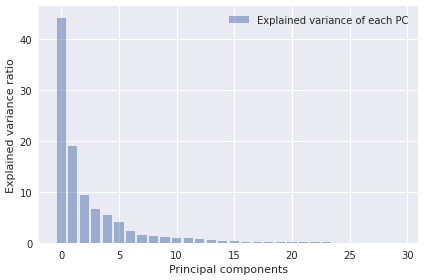

In [10]:
import matplotlib.pyplot as plt

# Plot for eigenvalues

var_exp = [(i / sum(values))*100 for i in sorted(values, reverse=True)]

with plt.style.context('seaborn'):
    plt.figure(figsize = (6, 4))

    plt.bar(range(30), var_exp, alpha = 0.5, align = 'center', label = 'Explained variance of each PC')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc = 'best')
    plt.tight_layout()

In [12]:
# Take the major components (first six)
matrix = []
for values in eigen_pair[:6]:
    matrix.append(values[1])

X_pca = np.array(matrix).T
X_re = X_std.dot(X_pca)
#print(X_re)

# Convert array into DF
X_re = pd.DataFrame(X_re)
X_re.columns = ['Principal Component - 1','Principal Component - 2','Principal Component - 3','Principal Component - 4','Principal Component - 5','Principal Component - 6']
X_re


,Principal Component - 1,Principal Component - 2,Principal Component - 3,Principal Component - 4,Principal Component - 5,Principal Component - 6
0,9.184755,1.946870,-1.122179,3.630536,1.194059,1.410184
1,2.385703,-3.764859,-0.528827,1.117281,-0.621228,0.028631
2,5.728855,-1.074229,-0.551263,0.911281,0.176930,0.540976
3,7.116691,10.266556,-3.229948,0.152413,2.958275,3.050737
4,3.931842,-1.946359,1.388545,2.938054,-0.546267,-1.225416
...,...,...,...,...,...,...
564,6.433655,-3.573673,2.457324,1.176279,0.074759,-2.373105
565,3.790048,-3.580897,2.086640,-2.503825,0.510274,-0.246493
566,1.255075,-1.900624,0.562236,-2.087390,-1.808400,-0.533977
567,10.365673,1.670540,-1.875379,-2.353960,0.033712,0.567437


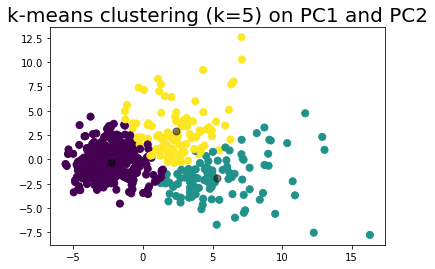

In [15]:
# apply kmeans clustering with k=2,3 and 5
from sklearn.cluster import KMeans

# change n_clusters to 2,3 and 5 to get visualizations of

# 2 means 3 means and 5 means
kmeans = KMeans(n_clusters=3).fit(X_re)

centroids = kmeans.cluster_centers_

# plot kmeans on pc1 and pc2
plt.scatter(X_re['Principal Component - 1'], X_re['Principal Component - 2'], c= kmeans.labels_.astype(float), s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=50,alpha=0.5)
plt.title("k-means clustering (k=5) on PC1 and PC2",fontsize=20)
plt.show()